# 12-1 : moons 데이터셋을 이용한 결정 트리 모델 학습

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [3]:
X_moon, y_moon = make_moons(n_samples = 500,
                            shuffle = True,
                            noise = 0.4,
                            random_state = 20152410)

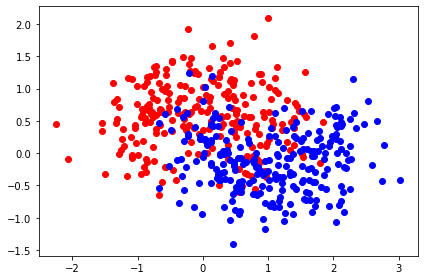

In [4]:
plt.figure(figsize = (6, 4))
plt.plot(X_moon[np.where(y_moon == 0)[0], 0], X_moon[np.where(y_moon == 0)[0], 1], 'ro')
plt.plot(X_moon[np.where(y_moon == 1)[0], 0], X_moon[np.where(y_moon == 1)[0], 1], 'bo')
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_moon,
                                                    y_moon,
                                                    train_size = 0.8,
                                                    stratify = y_moon,
                                                    random_state = 20152410)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [7]:
tree_clf = DecisionTreeClassifier()
tree_params = {'criterion' : ['gini', 'entropy'],
               'max_depth' : list(range(3, 10)),
               'min_samples_split' : list(range(2, 21, 2)),
               'max_features' : ['auto'],
               'max_leaf_nodes' : list(range(10, 101, 10))}

tree_clf_gridsearch = GridSearchCV(estimator = tree_clf,
                                   param_grid = tree_params,
                                   cv = 4,
                                   verbose = 1)

In [8]:
tree_clf_gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 1400 candidates, totalling 5600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5600 out of 5600 | elapsed:    7.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [9]:
pd.DataFrame(tree_clf_gridsearch.cv_results_).sort_values(by = 'mean_test_score',
                                                          ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
20,0.000418,0.000002,0.000263,0.000019,gini,3,auto,30,2,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.85,0.87,0.85,0.80,0.8425,0.025860,1
945,0.000599,0.000013,0.000256,0.000005,entropy,5,auto,50,12,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.85,0.85,0.86,0.81,0.8425,0.019203,1
1014,0.000638,0.000014,0.000265,0.000014,entropy,6,auto,20,10,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.85,0.85,0.86,0.81,0.8425,0.019203,1
226,0.000565,0.000082,0.000286,0.000017,gini,5,auto,30,14,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.85,0.85,0.86,0.80,0.8400,0.023452,4
873,0.000590,0.000043,0.000264,0.000010,entropy,4,auto,80,8,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.85,0.86,0.85,0.80,0.8400,0.023452,4


In [10]:
tree_clf_gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
best_tree_clf = tree_clf_gridsearch.best_estimator_
best_tree_clf.fit(X_train, y_train)
y_pred_tree = best_tree_clf.predict(X_test)

print('Decision Tree 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_tree)))
print(confusion_matrix(y_test, y_pred_tree))

Decision Tree 모델의 test accuracy : 0.85
[[41  9]
 [ 6 44]]


# 12-2 : mnist 데이터셋을 이용해 모델 학습

In [12]:
mnist = fetch_openml('mnist_784')

In [13]:
def mnist_stratified_sampling(target):
    '''각 숫자별로 550개씩 총 5500개 샘플 추출'''
    np.random.seed(20152410)
    index_list = [np.random.permutation(np.where(target == i)[0])[:1100]
                  for i in range(10)]
    index = np.concatenate(index_list)
    
    return index

X = mnist['data']
y = mnist["target"].astype(np.int)

sample_index = mnist_stratified_sampling(y)
X_small = X[sample_index] / 255
y_small = y[sample_index]

from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits = 11)

for train_index, test_index in stratified_kfold.split(X_small, y_small):
    # train : 10000, test : 1000
    X_train, X_test = X_small[train_index], X_small[test_index]
    y_train, y_test = y_small[train_index], y_small[test_index]

In [14]:
sgd_clf = SGDClassifier(random_state = 20152410)
rf_clf = RandomForestClassifier(random_state = 20152410)
extra_clf = ExtraTreesClassifier(random_state = 20152410)

In [15]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=20152410, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20152410,
                       verbose=0, warm_start=False)

In [17]:
extra_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=20152410,
                     verbose=0, warm_start=False)

In [18]:
y_pred_sgd = sgd_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_extra = extra_clf.predict(X_test)

In [19]:
print('SGDClassifier 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_sgd)))
print(confusion_matrix(y_test, y_pred_sgd))

SGDClassifier 모델의 test accuracy : 0.889
[[96  0  1  0  1  0  1  0  0  1]
 [ 0 97  1  0  1  0  0  0  1  0]
 [ 0  0 86  8  2  0  1  3  0  0]
 [ 0  1  3 92  0  1  0  1  2  0]
 [ 0  3  3  0 92  1  0  0  0  1]
 [ 0  0  2  6  4 80  1  1  4  2]
 [ 1  0  0  0  1  2 95  0  1  0]
 [ 1  0  1  0  3  0  0 93  0  2]
 [ 1  6  2  2  1  6  2  1 73  6]
 [ 0  2  0  0  8  0  0  5  0 85]]


In [20]:
print('RandomForestClassifier 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_rf)))
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier 모델의 test accuracy : 0.953
[[99  0  0  0  0  1  0  0  0  0]
 [ 0 99  1  0  0  0  0  0  0  0]
 [ 1  0 94  1  2  0  0  1  0  1]
 [ 0  0  3 89  1  3  1  0  2  1]
 [ 1  1  0  0 95  0  1  0  0  2]
 [ 1  0  0  1  0 94  1  0  2  1]
 [ 1  0  0  0  0  1 98  0  0  0]
 [ 1  0  2  0  0  0  0 97  0  0]
 [ 0  0  2  0  0  2  0  0 93  3]
 [ 0  1  0  0  1  1  0  2  0 95]]


In [21]:
print('ExtraTreesClassifier 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_extra)))
print(confusion_matrix(y_test, y_pred_extra))

ExtraTreesClassifier 모델의 test accuracy : 0.953
[[98  0  0  0  0  1  0  0  1  0]
 [ 0 99  1  0  0  0  0  0  0  0]
 [ 0  0 95  1  2  0  0  1  0  1]
 [ 0  0  3 91  1  3  0  0  2  0]
 [ 0  1  1  0 92  0  1  0  0  5]
 [ 1  0  0  2  0 95  1  1  0  0]
 [ 1  0  0  0  0  2 97  0  0  0]
 [ 1  0  2  0  0  0  0 95  0  2]
 [ 0  0  1  0  0  2  1  0 95  1]
 [ 0  1  0  0  0  1  0  2  0 96]]


In [22]:
voting_clf = VotingClassifier([('SGD', SGDClassifier(loss = 'log', random_state = 20152410)),
                               ('RandomForest', RandomForestClassifier(random_state = 20152410)),
                               ('ExtraTrees', ExtraTreesClassifier(random_state = 20152410))],
                              voting = 'soft')

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators = 100,
                                bootstrap = True,
                                random_state = 20152410)

In [23]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('SGD',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=20152410,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbos...
                                                   criterion='gini',
                                                   max_depth=None,
                    

In [24]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [25]:
y_pred_voting = voting_clf.predict(X_test)
y_pred_bagging = bagging_clf.predict(X_test)

In [26]:
print('VotingClassifier 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_voting)))
print(confusion_matrix(y_test, y_pred_voting))

VotingClassifier 모델의 test accuracy : 0.931
[[96  0  1  0  0  1  2  0  0  0]
 [ 0 99  1  0  0  0  0  0  0  0]
 [ 0  0 95  2  2  0  0  1  0  0]
 [ 0  0  4 91  0  2  0  1  2  0]
 [ 0  2  1  0 92  1  0  0  1  3]
 [ 1  0  0  3  1 88  1  1  3  2]
 [ 1  0  0  0  0  2 97  0  0  0]
 [ 1  0  1  0  1  0  0 95  0  2]
 [ 2  1  0  2  2  4  1  1 84  3]
 [ 0  1  0  0  3  0  0  2  0 94]]


In [27]:
print('BaggingClassifier 모델의 test accuracy : {}'.format(accuracy_score(y_test, y_pred_bagging)))
print(confusion_matrix(y_test, y_pred_bagging))

BaggingClassifier 모델의 test accuracy : 0.932
[[99  0  0  0  0  1  0  0  0  0]
 [ 0 98  1  0  0  1  0  0  0  0]
 [ 1  0 92  1  2  0  1  1  0  2]
 [ 1  0  4 86  1  0  1  0  4  3]
 [ 0  0  1  1 92  0  1  0  1  4]
 [ 1  1  0  2  1 88  2  2  2  1]
 [ 1  0  0  0  0  3 96  0  0  0]
 [ 0  0  3  0  0  0  0 97  0  0]
 [ 1  1  0  2  0  0  1  0 92  3]
 [ 0  1  0  1  2  0  0  3  1 92]]


# 12-3 : 타이타닉 데이터셋을 이용한 모델 학습

In [28]:
titanic_train = pd.read_csv('./train.csv')
titanic_test = pd.read_csv('./test.csv')

In [29]:
titanic_train_dtypes = {}
train_dtypes = ['int16', 'int16','category','object','category','float32','int8','int8','object','float32','object','category']

for index, value in enumerate(titanic_train.columns):
    titanic_train_dtypes[value] = train_dtypes[index]


titanic_test_dtypes = {}
test_dtypes = ['int16', 'category','object','category','float32','int8','int8','object','float32','object','category']

for index, value in enumerate(titanic_test.columns):
    titanic_test_dtypes[value] = test_dtypes[index]

In [30]:
titanic_train = titanic_train.astype(titanic_train_dtypes)
titanic_test = titanic_test.astype(titanic_test_dtypes)

In [31]:
print(titanic_train.shape, titanic_test.shape)

(891, 12) (418, 11)


In [32]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int16   
 1   Survived     891 non-null    int16   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float32 
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float32(2), int16(2), int8(2), object(3)
memory usage: 36.1+ KB


In [33]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int16   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float32 
 5   SibSp        418 non-null    int8    
 6   Parch        418 non-null    int8    
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float32 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(3), float32(2), int16(1), int8(2), object(3)
memory usage: 16.3+ KB


In [34]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S


In [35]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 전처리

예측에 필요없는 변수 PassengerId, Name, Ticket 제거  
결측치가 너무 많은 변수 Cabin 제거  
위의 두 변수를 제거한 후에도 결측치가 있는 case 제거

In [36]:
def preprocessing(train, test):
    '전처리 후 matrix 형태로 반환'
    import patsy

    data = pd.concat([train, test], axis = 0)
    data.Survived.fillna(value = 999, inplace = True)
    
    # Name, Ticket, Cabin 변수 제거
    data = data.drop(columns = ['Name', 'Ticket', 'Cabin'])
    
    # 결측치가 있는 케이스 제거
    data = data.dropna(axis = 0)
    
    # matrix 형태로 변환
    data_matrix = patsy.dmatrices('Survived ~ -1 + PassengerId + Pclass + Sex + Age + SibSp + Parch + Fare + Embarked',
                                  data = data,
                                  return_type = 'dataframe')
    y = data_matrix[0]
    X = data_matrix[1]

    y_train = y.loc[y.Survived != 999]    
    X_train = X.loc[X.PassengerId <= 891].drop(columns = ['PassengerId'])
    X_test = X.loc[X.PassengerId > 891].drop(columns = ['PassengerId'])
    
    data_dict = {'X_train' : X_train,
                 'y_train' : y_train,
                 'X_test' : X_test}

    return data_dict

In [37]:
data_processed = preprocessing(train = titanic_train, test = titanic_test)

In [38]:
data_processed['X_train'].head()

,Pclass[1],Pclass[2],Pclass[3],Sex[T.male],Embarked[T.Q],Embarked[T.S],Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,1.0,0.0,1.0,22.0,1.0,0.0,7.250000
1,1.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0,0.0,71.283302
2,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,7.925000
3,1.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0,53.099998
4,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0.0,0.0,8.050000


In [39]:
data_processed['X_test'].head()

,Pclass[1],Pclass[2],Pclass[3],Sex[T.male],Embarked[T.Q],Embarked[T.S],Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,1.0,1.0,0.0,34.5,0.0,0.0,7.8292
1,0.0,0.0,1.0,0.0,0.0,1.0,47.0,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,1.0,0.0,62.0,0.0,0.0,9.6875
3,0.0,0.0,1.0,1.0,0.0,1.0,27.0,0.0,0.0,8.6625
4,0.0,0.0,1.0,0.0,0.0,1.0,22.0,1.0,1.0,12.2875


In [40]:
data_processed['y_train'].head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [41]:
X_train, X_val, y_train, y_val = train_test_split(data_processed['X_train'],
                                                  data_processed['y_train'],
                                                  train_size = 0.8,
                                                  stratify = data_processed['y_train'],
                                                  random_state = 20152410)

## DecisionTreeClassifier

In [42]:
tree_clf = DecisionTreeClassifier()
tree_params = {'max_depth' : list(range(5, 16, 2)),
               'min_samples_leaf' : list(range(1, 20, 2))}

tree_gridcv = GridSearchCV(tree_clf,
                           tree_params,
                           cv = 4,
                           verbose = 1)

In [43]:
tree_gridcv.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15],
                 

In [44]:
pd.DataFrame(tree_gridcv.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
12,0.002772,0.000728,0.000910,0.000029,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.825175,0.767606,0.746479,0.809859,0.787280,0.031613,1
38,0.002316,0.000051,0.000907,0.000019,11,17,"{'max_depth': 11, 'min_samples_leaf': 17}",0.818182,0.767606,0.746479,0.802817,0.783771,0.028279,2
58,0.002664,0.000443,0.001032,0.000225,15,17,"{'max_depth': 15, 'min_samples_leaf': 17}",0.818182,0.767606,0.746479,0.802817,0.783771,0.028279,2
28,0.002969,0.000569,0.001226,0.000495,9,17,"{'max_depth': 9, 'min_samples_leaf': 17}",0.818182,0.767606,0.746479,0.802817,0.783771,0.028279,2
8,0.002783,0.000484,0.001199,0.000244,5,17,"{'max_depth': 5, 'min_samples_leaf': 17}",0.818182,0.767606,0.746479,0.802817,0.783771,0.028279,2


In [45]:
tree_best_clf = tree_gridcv.best_estimator_
tree_best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_val_pred_tree = tree_best_clf.predict(X_val)

print('DecisionTreeClassifier validation accuracy : {:0.2f}%'.format(100*accuracy_score(y_val, y_val_pred_tree)))
print('\n')
print(confusion_matrix(y_val, y_val_pred_tree))
print('\n')
print(classification_report(y_val, y_val_pred_tree))

DecisionTreeClassifier validation accuracy : 78.32%


[[76  9]
 [22 36]]


              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        85
         1.0       0.80      0.62      0.70        58

    accuracy                           0.78       143
   macro avg       0.79      0.76      0.76       143
weighted avg       0.79      0.78      0.78       143



In [47]:
tree_final_clf = tree_gridcv.best_estimator_
tree_final_clf.fit(data_processed['X_train'], data_processed['y_train'])

y_test_pred_tree = tree_best_clf.predict(data_processed['X_test'])
np.unique(y_test_pred_tree, return_counts = True)

(array([0., 1.]), array([220, 111]))

## RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier()
rf_params = {'n_estimators' : list(range(25, 201, 25)),
             'max_depth' : list(range(3, 14, 2))}

rf_gridcv = GridSearchCV(rf_clf,
                         rf_params,
                         cv = 4,
                         verbose = 1)

In [49]:
rf_gridcv.fit(X_train, np.asarray(y_train).reshape(-1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   32.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [50]:
pd.DataFrame(rf_gridcv.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
21,0.206998,0.003460,0.015814,0.003345,7,150,"{'max_depth': 7, 'n_estimators': 150}",0.832168,0.802817,0.767606,0.838028,0.810155,0.027954,1
10,0.101966,0.003018,0.007871,0.000944,5,75,"{'max_depth': 5, 'n_estimators': 75}",0.832168,0.788732,0.760563,0.852113,0.808394,0.035885,2
23,0.283961,0.006309,0.018726,0.000776,7,200,"{'max_depth': 7, 'n_estimators': 200}",0.832168,0.795775,0.767606,0.830986,0.806634,0.026861,3
40,0.037749,0.000788,0.003506,0.000026,13,25,"{'max_depth': 13, 'n_estimators': 25}",0.839161,0.795775,0.753521,0.838028,0.806621,0.035293,4
19,0.139880,0.004235,0.010851,0.001008,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.860140,0.781690,0.760563,0.823944,0.806584,0.038429,5


In [51]:
rf_best_clf = rf_gridcv.best_estimator_
rf_best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_val_pred_rf = rf_best_clf.predict(X_val)

print('RandomForestClassifier validation accuracy : {:0.2f}%'.format(100*accuracy_score(y_val, y_val_pred_rf)))
print('\n')
print(confusion_matrix(y_val, y_val_pred_rf))
print('\n')
print(classification_report(y_val, y_val_pred_rf))

RandomForestClassifier validation accuracy : 79.02%


[[73 12]
 [18 40]]


              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        85
         1.0       0.77      0.69      0.73        58

    accuracy                           0.79       143
   macro avg       0.79      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [53]:
rf_final_clf = rf_gridcv.best_estimator_
rf_final_clf.fit(data_processed['X_train'], np.asarray(data_processed['y_train']).reshape(-1))

y_test_pred_rf = tree_best_clf.predict(data_processed['X_test'])
np.unique(y_test_pred_rf, return_counts = True)

(array([0., 1.]), array([220, 111]))